**<font color = black size=6>实验八:降维</font>**

本次实验为编写机器学习中的用于降维的PCA(主成分分析)算法。在本次实验中，我们将对一个维度过高的数据集进行降维。

In [743]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from pandas.core.frame import DataFrame

**<font color = blue size=4>第一部分:函数介绍</font>**

介绍一些可以用到的函数

1.计算方阵的特征值和特征向量

In [744]:
a=np.array([[1,0,0],[0,2,0],[0,0,3]])
vals,vecs=np.linalg.eig(a)
print("该矩阵的特征值:",vals)
print("该矩阵的特征向量:",vecs)

该矩阵的特征值: [1. 2. 3.]
该矩阵的特征向量: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2.排序函数

In [745]:
#list的排序
a=[3,1,2,4]
a.sort()
print(a)
#字典的排序
a=[3,1,2,4]
b=[[0,0,3,0],[1,0,0,0],[0,2,0,0],[0,0,0,4]]
c = [(a[i],b[i]) for i in range(len(a))]
print("未排序前:",c)
c=sorted(c)
print("排序后:",c)

[1, 2, 3, 4]
未排序前: [(3, [0, 0, 3, 0]), (1, [1, 0, 0, 0]), (2, [0, 2, 0, 0]), (4, [0, 0, 0, 4])]
排序后: [(1, [1, 0, 0, 0]), (2, [0, 2, 0, 0]), (3, [0, 0, 3, 0]), (4, [0, 0, 0, 4])]


**<font color = blue size=4>第二部分:实验任务</font>**

本任务使用train_data.csv数据集，共有九维特征.本次实验实现PCA算法，下面是PCA算法的伪代码

In [746]:
%%html
<img src="PCA Pseudocode.png", width=720, heigth=240>

**<font color = green size=3>1):降维</font>**

<span style="color:purple">1.将训练集"train_data.csv"导入，训练集共有167个样本，每个样本有9个特征值，将原始数据按列组成9行167列的矩阵X</span>

In [747]:
#your code here
train_data = pd.read_csv('train_data.csv')
train_data = np.array(train_data)
# print(train_data.shape)

# 将原始数据进行转置 得到矩阵X
X = train_data.T
print(X.shape)
print(X)

(9, 167)
[[9.02e+01 1.66e+01 2.73e+01 ... 2.33e+01 5.63e+01 8.31e+01]
 [1.00e+01 2.80e+01 3.84e+01 ... 7.20e+01 3.00e+01 3.70e+01]
 [7.58e+00 6.55e+00 4.17e+00 ... 6.84e+00 5.18e+00 5.89e+00]
 ...
 [5.62e+01 7.63e+01 7.65e+01 ... 7.31e+01 6.75e+01 5.20e+01]
 [5.82e+00 1.65e+00 2.89e+00 ... 1.95e+00 4.67e+00 5.40e+00]
 [5.53e+02 4.09e+03 4.46e+03 ... 1.31e+03 1.31e+03 1.46e+03]]


<span style="color:purple">2.对所有样本进行中心化，即将X的每一行减去这一行的均值</span>

In [748]:
#your code here
mean_value = np.mean(X,axis=1) # 获取每一行的均值
for i in range(X.shape[0]):  # 对于每一行
        X[i,:]-=mean_value[i] # 每一行减去这一行的均值 
print(X)

[[ 5.19299401e+01 -2.16700599e+01 -1.09700599e+01 ... -1.49700599e+01
   1.80299401e+01  4.48299401e+01]
 [-3.11089760e+01 -1.31089760e+01 -2.70897605e+00 ...  3.08910240e+01
  -1.11089760e+01 -4.10897605e+00]
 [ 7.64311377e-01 -2.65688623e-01 -2.64568862e+00 ...  2.43113772e-02
  -1.63568862e+00 -9.25688623e-01]
 ...
 [-1.43556886e+01  5.74431138e+00  5.94431138e+00 ...  2.54431138e+00
  -3.05568862e+00 -1.85556886e+01]
 [ 2.87203593e+00 -1.29796407e+00 -5.79640719e-02 ... -9.97964072e-01
   1.72203593e+00  2.45203593e+00]
 [-1.24111557e+04 -8.87415569e+03 -8.50415569e+03 ... -1.16541557e+04
  -1.16541557e+04 -1.15041557e+04]]


<span style="color:purple">3.求出协方差矩阵$X$.$X^T$</span>

In [749]:
#your code here
# cov_mat = np.cov(X)
# print(cov_mat)
# print(X.shape)
cov_mat = X@X.T
# print(cov_mat==np.cov(X))
# cov_mat=np.cov(X)

<span style="color:purple">4.对协方差矩阵$X$.$X^T$做特征值分解，即求出协方差矩阵的特征值$\vec{\lambda}=\{\lambda_1,\lambda_2,...,\lambda_d\}$及对应的特征向量$\vec{\omega}=\{\omega_1,\omega_2,...,\omega_d\}$. 其中$\lambda_i \sim \omega_i$.</span>

In [750]:
#your code here
feature_val,feature_vec = np.linalg.eig(cov_mat)
print(feature_val)
print(feature_vec)

[1.11342747e+11 6.11653233e+09 2.07662463e+05 1.62903834e+05
 2.24346102e+04 1.21999805e+04 2.13848213e+03 1.01593379e+02
 7.03486236e+02]
[[ 8.07327698e-04 -5.57055026e-04  9.25215339e-01  3.28783999e-01
  -3.94786565e-02  6.08330796e-02  1.72243208e-01  2.86316097e-02
   1.14007614e-02]
 [-5.11348092e-04  9.41707964e-04 -2.28627282e-01  6.52814366e-01
   5.94987240e-01  4.01990656e-01 -2.82288000e-02 -9.11761529e-04
   7.18179698e-02]
 [-2.52724061e-05 -2.15627987e-04 -9.25844014e-03 -7.58649598e-03
  -7.77516009e-02 -5.54312529e-02  3.77513839e-03 -2.20880747e-02
   9.95106331e-01]
 [-1.14384869e-04  5.41883715e-05 -2.42704100e-01  6.78156522e-01
  -5.29179120e-01 -4.41412073e-01  4.82031359e-02 -1.18487096e-03
  -6.32323521e-02]
 [-7.26746756e-01  6.86903991e-01  1.17358496e-03 -4.12812338e-04
  -6.84017169e-04 -1.95004065e-04  2.11994794e-05 -1.24806993e-05
   7.34940532e-05]
 [ 7.65998651e-05  2.85616792e-04  8.73842384e-02 -2.19844970e-02
   5.95872597e-01 -7.97849917e-01 -1.108

<span style="color:purple">5.选取降维后的维度k：依据特征值计算方差的贡献率，先将所有特征值按照降序进行排序。要求降维后的数据方差占比超过阈值t%，公式如下. 我们这里取阈值为t%=99%:
    $$\frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^k\lambda_i} \geq t\%$$
</span>

In [751]:
#your code here

# 阈值
threshold_t=0.99
# 使用numpy.sort函数进行降序排序
feature_val_sorted = np.sort(feature_val)[::-1]
total_variance = sum(feature_val_sorted) # 计算总方差
temple_variance = 0 # 对其进行累加
k = 0
# 根据索引来确定k值
for i in range(len(feature_val_sorted)):
    temple_variance += feature_val_sorted[i]
    if (temple_variance / total_variance) >= threshold_t:
        k = i + 1  # i从0开始 需要加1
        break
print("降维后的维度为:", k)

降维后的维度为: 2


<span style="color:purple">6.将特征向量按对应特征值大小从上到下按行排列，取前k个对应特征值最大的特征向量组成投影矩阵W=($\omega_1,\omega_2,...,\omega_k$)</span>

In [752]:
#your code here
# 获取降序排列特征值的索引
sorted_indices = np.argsort(feature_val)[::-1]
print(type(feature_val))
print(sorted_indices)
# 对特征向量矩阵进行重排，以匹配降序特征值
sorted_feature_vec = feature_vec[:, sorted_indices]
# 取前k个对应特征值最大的特征向量组成投影矩阵
W = sorted_feature_vec[:, :k]
print(W.T)

<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 8 7]
[[ 8.07327698e-04 -5.11348092e-04 -2.52724061e-05 -1.14384869e-04
  -7.26746756e-01  7.65998651e-05 -2.13850032e-04  2.87952778e-05
  -6.86904777e-01]
 [-5.57055026e-04  9.41707964e-04 -2.15627987e-04  5.41883715e-05
   6.86903991e-01  2.85616792e-04  2.66353737e-05 -2.40728708e-05
  -7.26747258e-01]]


<span style="color:purple">7.根据公式$Y=P.X$得到降维到k维后的数据集Y。

In [753]:
#your code here
Y = np.dot(W.T,X)
print(Y.shape)
print(Y)

(2, 167)
[[ 1.98151280e+04  1.13389390e+04  8.92635259e+03  1.46524659e+04
  -8.96142032e+02  6.99699306e+02  1.42839444e+04 -4.43727025e+04
  -4.22463421e+04  5.72551309e+03 -1.45108648e+04 -2.27232733e+04
   1.90710762e+04 -7.44735254e+02  5.44962091e+03 -3.90029276e+04
   1.26570298e+04  1.95217046e+04  1.52018204e+04  1.60732239e+04
   1.11343558e+04  7.33742276e+03  3.13382968e+03 -6.14585742e+04
   5.54730448e+03  1.99308479e+04  2.06511429e+04  1.89936758e+04
   1.85320664e+04 -4.07729133e+04  1.48543911e+04  2.04133880e+04
   1.93463083e+04 -1.59499352e+03  1.13067962e+04  9.15029156e+03
   1.98120978e+04  2.06930387e+04  1.57110532e+04  6.28464073e+03
   1.85720720e+04 -2.51586246e+03 -2.44284312e+04 -1.28027054e+04
  -5.04523815e+04  9.55447409e+03  1.13689253e+04  1.24133172e+04
   1.40058814e+04 -1.48724121e+04  2.00019561e+04 -5.16102258e+03
   1.35161752e+04 -3.92945631e+04 -3.33403230e+04  4.16268815e+03
   1.97725914e+04  1.44407278e+04 -3.67082311e+04  1.82413350e+04
 

<span style="color:purple">8.请从降维的特征值选择其中两个（如果降维后不足二维，则跳过这部分）作为绘图的横纵坐标，将所有样本绘制到一张图中，其中同一聚类的样本点绘制为相同颜色</span>

In [754]:
# 放置之前的聚类函数
#曼哈顿距离
def manhattan_distance(x, y):
    
    return np.sum(np.abs(x-y))

#欧式距离
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2)) 

# 定义均值向量初始化函数 
def initialize_centroids(dataframe, k):
    initial_centroids = dataframe.sample(n=k, random_state=42)
    mu = initial_centroids.values
    # 返回numpy矩阵形式的均值向量
    return mu
# 比较均值向量是否相同
def equallist(x,y):
    return np.array_equal(x,y)

# 将整个过程封装为K-means函数 
def k_means(dataframe, k, distance_function=euclidean_distance):
    # 初始化均值向量
    centroids = initialize_centroids(dataframe, k)
    # 初始化为0  后续用来进行比较
    prev_centroids = np.zeros_like(centroids) 
    # 迭代过程
    while True:

        # 初始化 创建一个空的字典来存储每个簇的样本
        clusters = {i: [] for i in range(k)}
        # print(type(clusters))

        # 遍历每个样本
        for x in np.array(dataframe):
            # 计算样本与k个聚类的簇心的距离
            distances = [distance_function(x, centroid) for centroid in centroids]
            # 找到距离最小的均值向量对应的簇
            # print(distances)
            cluster_index = np.argmin(distances)
            # print(cluster_index)
            # 将样本划分到该簇中
            clusters[cluster_index].append(x)

        # 更新这轮迭代的簇心
        for i in range(k):
            if len(clusters[i]) > 0:  # 防止空簇
                centroids[i] = np.mean(clusters[i], axis=0)

        # 判断均值向量是否发生变化
        if np.array_equal(centroids, prev_centroids):
            break
        # 使用copy保存当前均值向量 防止被修改 要使用copy
        prev_centroids = centroids.copy()
    # 返回均值向量(簇心)和样本划分的结果
    return centroids, clusters

# 将字典中的空簇丢弃
def get_non_empty_clusters(clusters):
    non_empty_clusters_values = {}
    # 遍历原有的簇心向量和相应的样本划分列表
    for key, value in clusters.items():
        # 如果簇非空
        if len(value) > 0:  
            non_empty_clusters_values[key] = value
    return non_empty_clusters_values


# 定义函数 计算簇中心和簇的均方误差
def compute_mse(centroids, clusters):
    total_points = sum([len(points) for points in clusters.values()]) # 获取全部样本的数量 后续用于取平均计算MSE
    ssd = 0 # 初始化平方误差为0
    for cluster_id, points in clusters.items():
        # 遍历对应簇的全部划分样本
        for point in points:
            ssd += np.sum(euclidean_distance(point, centroids[cluster_id]) ** 2)
    # 返回均方误差
    return ssd / total_points

# 定义函数 绘制肘部曲线 用来选择合适的k值
def elbow_method(dataframe, max_k=10):
    # 存储对应k值的均方误差MSE的列表
    mse_list = []

    # 对于每个k值进行k-means并计算簇划分的均方误差
    for k in range(1, max_k+1):
        centroids, clusters = k_means(dataframe, k)
        mse = compute_mse(centroids, clusters)
        mse_list.append(mse)
    
    # 绘制k值与均方误差的关系图 根据肘部法则找到肘点
    plt.plot(range(1, max_k+1), mse_list,'ro-')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.title('Elbow Method For Optimal k')
    plt.show()

# K-means算法
def plot_kmeans_clusters(dataframe, centroids, clusters):
    # 根据生成等距间隔的数字来选取颜色
    colors = plt.cm.rainbow(np.linspace(0, 1, len(centroids)))

    # 绘制每个簇的数据点
    for i, color in enumerate(colors):
        if i in clusters:
            x_i = [point[0] for point in clusters[i]]
            y_i = [point[1] for point in clusters[i]]
            plt.scatter(x_i, y_i, c=[color]*len(clusters[i]), label=f"Cluster {i}",marker='o', s=50, alpha=0.7, edgecolor='black')

    # 绘制簇心
    x_centroids = [centroid[0] for centroid in centroids]
    y_centroids = [centroid[1] for centroid in centroids]
    plt.scatter(x_centroids, y_centroids, c='black', marker='x', label='Centroids')

    plt.legend()
    plt.title("K-means Clustering")
    plt.xlabel(dataframe.columns[0])
    plt.ylabel(dataframe.columns[1])
    plt.grid()
    plt.show()



# 下面是DBSCAN算法

def get_neighbors(D, index, epsilon, distance_function=euclidean_distance):
    neighbors=[] # 初始化index样本的邻域对象的样本索引列表
    # 遍历所有样本
    for i,sample in enumerate(D):
        # 如果样本与当前样本的距离小于等于邻域半径epsilon,则将其加入邻域内
        if i!=index and distance_function(sample,D[index])<=epsilon:
            neighbors.append(i)
    # 返回该样本的邻域对象的样本索引列表
    return neighbors

def core_set(D,epsilon,MinPts, distance_function=euclidean_distance):
    # 初始化核心对象集合
    core_objects = []

    # 对每个样本进行遍历
    for i in range(len(D)):
        # 获取邻域内的所有样本的索引
        neighbors = get_neighbors(D, i, epsilon,distance_function)
        # 如果邻域内的样本数量大于等于最小样本数MinPts，则将当前样本标记为核心对象
        if len(neighbors) >= MinPts:
            # 将该索引添加到核心对象集合中  即将当前样本标记为核心对象
            core_objects.append(i)
    # 返回数据集D的所有核心对象(索引)
    return core_objects

def dbscan(D,epsilon,MinPts, distance_function=euclidean_distance):
    # 初始化标签数组，0表示未分类
    labels = [0]*len(D)

    # 生成核心对象集合
    core_objects=core_set(D,epsilon,MinPts,distance_function)
    # 定义当前簇的标签
    current_cluster_label = 0

    # 对核心对象集合进行遍历
    for index in core_objects:
        
        # 如果核心对象已经分类，则跳过
        if labels[index]!=0:
            continue

        # 创建一个新的簇
        current_cluster_label+=1
        # 将核心对象标记为该簇
        labels[index]=current_cluster_label
         
        # 获取由核心对象密度直达的样本集合Δ
        Δ = get_neighbors(D, index, epsilon,distance_function)

        # 遍历样本集合Δ
        while Δ:
            
            # 取出一个样本
            neighbor_index =Δ.pop(0)
            
            # 如果样本已经分类，则跳过
            if labels[neighbor_index]!=0:
                continue
            # 没有跳过 则说明样本未被分类    
            # 将样本标记为当前簇
            labels[neighbor_index] = current_cluster_label
            
            # 获取由样本密度直达的样本集合Δ'
            Δ_prime = get_neighbors(D, neighbor_index, epsilon,distance_function)
            
            # 如果样本是核心对象，则将Δ'中的样本加入Δ
            if len(Δ_prime) >= MinPts:
                Δ.extend(Δ_prime)
    # 返回对应每个样本的簇类别的列表
    return labels

def plot_dbscan_clusters(dataframe, labels):
    # 为每个聚类分配一个颜色
    unique_labels = set(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        # 对于每一个簇，找到属于它的数据点
        cluster_indices = np.where(np.array(labels) == label)
        cluster_data = dataframe.iloc[cluster_indices]

        # 绘制簇的数据点
        plt.scatter(cluster_data[dataframe.columns[0]], cluster_data[dataframe.columns[1]], 
                    c=[color], label=f"Cluster {label}",marker='o', s=50, alpha=0.7, edgecolor='black')

    plt.legend()
    plt.title("DBSCAN Clustering")
    plt.xlabel(dataframe.columns[0])  # 将第一列特征值作为x轴
    plt.ylabel(dataframe.columns[1])  # 将第二列特征值作为y轴
    plt.grid()
    plt.show()

(167, 2)


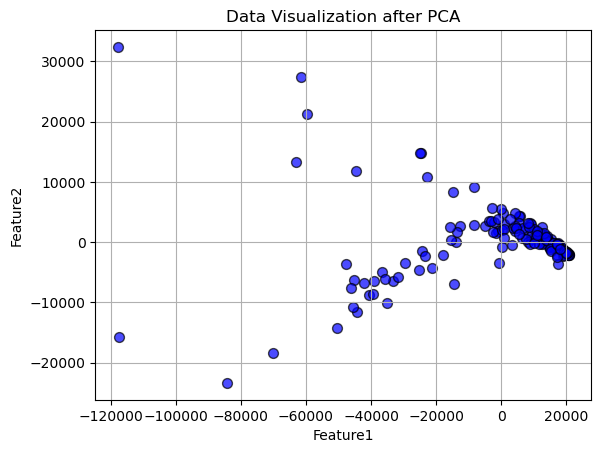

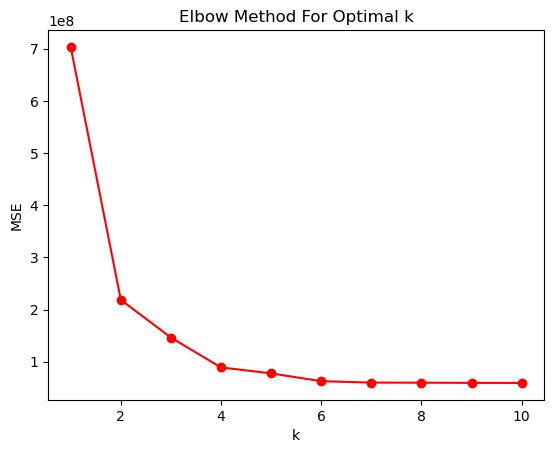

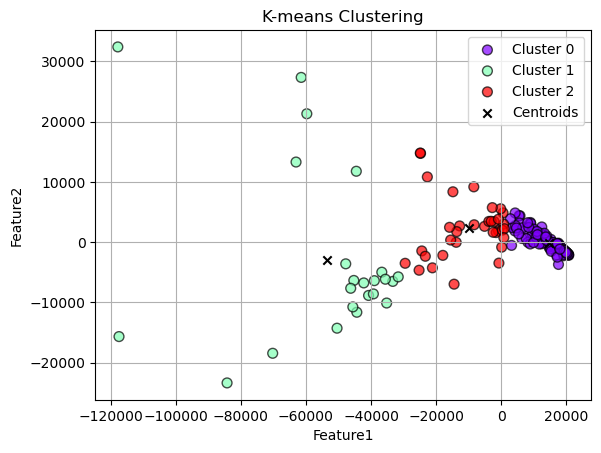

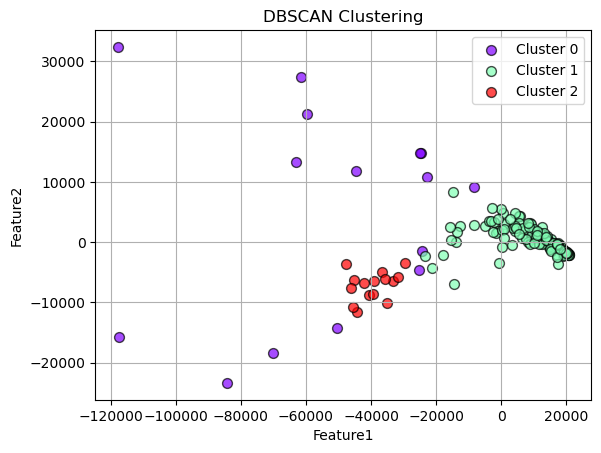

In [755]:
#your code here

# 发现降维后只有两个特征
Y=Y.T # 变为(m,k)的形状
feature_names = ['Feature1', 'Feature2']
dataframe = pd.DataFrame(Y, columns=feature_names)
print(Y.shape)
# 检查 Y 是否至少有两个特征
if Y.shape[1] < 2:
    print("降维后的特征不足以进行二维绘图。")
else:
    # 普通的可视化
    # plt.scatter(Y[:, 0], Y[:, 1],c='blue',marker='o')
    plt.scatter(Y[:, 0], Y[:, 1], c='blue', marker='o', s=50, alpha=0.7, edgecolor='black')
    plt.title('Data Visualization after PCA')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.grid()
    plt.show()
    # 聚类的可视化
    # K-means算法
    elbow_method(dataframe) # 肘部法则选取k值
    centroids,clusters=k_means(dataframe,3) # 调用K-means算法 获取到簇心和对应的划分
    clusters= get_non_empty_clusters(clusters) # 去掉空簇
    plot_kmeans_clusters(dataframe, centroids, clusters) # 调用定义的函数进行聚类图象绘制
    # DBSCAN算法 
    labels=dbscan(Y,6000,6) # 调用DBSCAN算法 获取到划分的标签
    plot_dbscan_clusters(dataframe, labels) # 调用定义的函数进行聚类图象绘制

**<font color = blue size=4>第三部分:作业提交</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、本次实验报告下周（11.10 14:20）交  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，提交时间为下周的实验课开始时，请注意及时提交。

实验八(降维)的实验报告:  
截止时间：2023-11-10 14:20  
提交地址：https://send2me.cn/U83-fI9G/T5Svof7YxaL6Ng

三、课堂课件获取地址:https://www.jianguoyun.com/p/Dag8kS8Qp5WhChjW06UFIAA  
实验内容获取地址:https://www.jianguoyun.com/p/Db5AxlgQp5WhChjY06UFIAA